# Problem Statement
Build a machine learning model that can classify SMS messages as spam or legitimate.

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd

### Read the dataset

In [3]:
sms = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
sms.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
891,ham,I am great princess! What are you thinking abo...,NaN,NaN,NaN
819,ham,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...,NaN,NaN,NaN
4477,ham,I anything lor.,NaN,NaN,NaN
1847,spam,FREE NOKIA Or Motorola with upto 12mths 1/2pri...,NaN,NaN,NaN
1044,spam,We know someone who you know that fancies you....,NaN,NaN,NaN


In [5]:
sms.shape

(5572, 5)

### Data Cleaning

In [6]:
# drop last 3 columns
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
sms.sample(5)

,v1,v2
1950,ham,Oh ic. I thought you meant mary jane.
4380,ham,Mathews or tait or edwards or anderson
5507,ham,I want to be inside you every night...
1866,ham,Or Ì_ go buy wif him then i meet Ì_ later can?
5488,ham,K. I will sent it again


In [8]:
sms.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
sms.sample(5)

,target,text
5096,ham,But i'm really really broke oh. No amount is t...
3531,ham,"Actually, my mobile is full of msg. And i m do..."
3854,spam,Free msg: Single? Find a partner in your area!...
4106,spam,HOT LIVE FANTASIES call now 08707500020 Just 2...
151,ham,Yup i thk cine is better cos no need 2 go down...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
sms['target'] = encoder.fit_transform(sms['target'])

In [11]:
sms.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# check for missing values and duplicate values
sms.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
sms.duplicated().sum()

403

In [14]:
# removing duplicate values
sms = sms.drop_duplicates(keep='first')

In [15]:
sms.duplicated().sum()

0

In [16]:
sms.shape

(5169, 2)

### Data Analysis

In [17]:
sms.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
sms['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

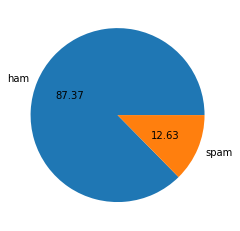

In [19]:
import matplotlib.pyplot as plt
plt.pie(sms['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [20]:
!pip install nltk

In [23]:
import nltk

In [24]:
# no. of characters
sms['num_character'] = sms['text'].apply(len)
sms.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# no. of words
sms['num_words'] = sms['text'].apply(lambda x:len(nltk.word_tokenize(x)))
sms.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# no. of sentences
sms['num_sentences'] = sms['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
sms.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:>

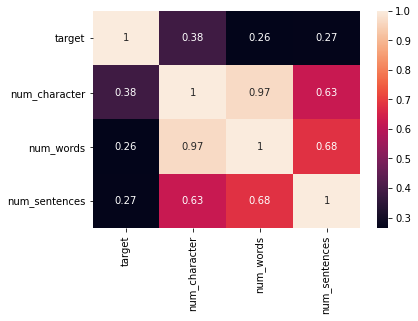

In [27]:
import seaborn as sn

sn.heatmap(sms.corr(), annot=True)

### Data Preprocessing

In [28]:
def transform(text):
    text = text.lower()    #lowercase
    text = nltk.word_tokenize(text)   #tokenization
    
    y=[]
    for i in text:    #removing special char
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [29]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [32]:
sms['transformed_text'] = sms['text'].apply(transform)
sms.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
spam_corpus = []
for msg in sms[sms['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [34]:
len(spam_corpus)

9939

In [35]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

## Implementation of ML Model using Naive Bayes

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [37]:
x = cv.fit_transform(sms['transformed_text']).toarray()
x.shape

(5169, 6708)

In [38]:
y = sms['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
gnb.fit(x_train, y_train)
y_prediction1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_prediction1))
print(confusion_matrix(y_test,y_prediction1))
print(precision_score(y_test,y_prediction1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [42]:
mnb.fit(x_train, y_train)
y_prediction2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_prediction2))
print(confusion_matrix(y_test,y_prediction2))
print(precision_score(y_test,y_prediction2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [43]:
bnb.fit(x_train, y_train)
y_prediction3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_prediction3))
print(confusion_matrix(y_test,y_prediction3))
print(precision_score(y_test,y_prediction3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Using Multinomial Naive Bayes Classifier

## Testing our model(mNB)

In [44]:
new_test_sample_ham = ["Hi, I'm Mohammad Nabizadeh and I am glad to share the program that I've written with everyone."]
     
new_test_sample_ham_vectorized = cv.transform(new_test_sample_ham)
sample_predict = mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0])

In [49]:
test_sample_spam= ["Congratulations, you've won a free Sony camera."]
test_sample_spam_vectorized = cv.transform(test_sample_spam)
sample = mnb.predict(test_sample_spam_vectorized)
sample

array([1])